In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [119]:
data = pd.read_csv('../data/processed/data.csv')

In [120]:
data.head()

,session_id,entropy,clicks_count,durations,click_frequency,speed_cv,hover_frequency,avg_hover_duration,acceleration_mean,acceleration_std,...,acceleration_pos_neg_ratio,direction_change_frequency,idle_active_ratio,label,time_afternoon,time_evening,time_morning,time_night,time_wee_hours,new_label
0,03jt2p4bdru20sjb9me2gco6j4,3.1219,10,1606000878926,0.0000,1.2928,3.2650,10044.0588,-97.9877,4076.5547,...,0.8357,0.5506,42482299.2573,human,0,0,1,0,0,human
1,071tbv7fsev5d64kb0f9jieor6,3.2211,19,677103,0.0000,0.5097,0.9652,1951.2750,-3.0795,1211.3551,...,1.0135,0.2351,2.2748,advanced_bot,0,1,0,0,0,bot
2,094i85crhkpkhqpi3rl4athrn4,2.8954,17,1606000279969,0.0000,0.5178,0.2184,966.9231,-94.0096,2813.9208,...,0.9361,0.2467,7828571.2362,advanced_bot,0,0,0,1,0,bot
3,0ht0u328t4mkgi01sp7mm07e01,2.4464,10,141246,0.0001,0.2326,3.9279,866.3270,-2.9786,616.0984,...,0.9840,33.1369,1.0282,moderate_bot,1,0,0,0,0,bot
4,0i5kvpslrq3vb6u8ff2kuejv0v,3.4528,16,460995,0.0000,0.5082,0.8952,2000.8831,-0.2050,1173.9429,...,1.0245,0.2451,2.1846,advanced_bot,0,1,0,0,0,bot


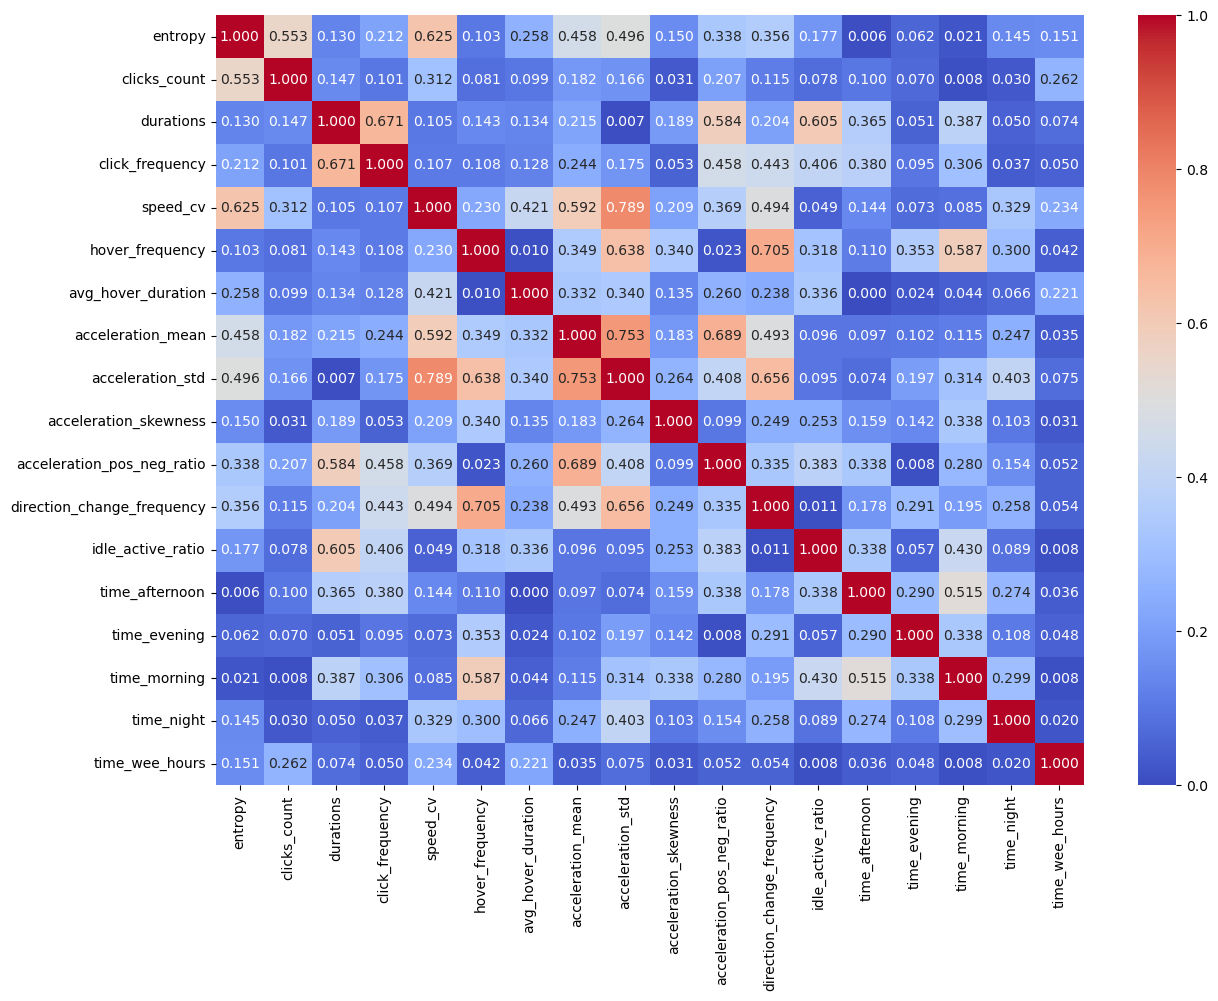

In [121]:
plt.figure(figsize=(14, 10))  # width=12 inches, height=8 inches

corr_matrix = data[[column for column in list(data.columns) if column != 'label' and column!= 'session_id' and column != 'new_label']].corr().abs()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', vmin=0, vmax=1)
plt.show()

In [122]:
corr_matrix

,entropy,clicks_count,durations,click_frequency,speed_cv,hover_frequency,avg_hover_duration,acceleration_mean,acceleration_std,acceleration_skewness,acceleration_pos_neg_ratio,direction_change_frequency,idle_active_ratio,time_afternoon,time_evening,time_morning,time_night,time_wee_hours
entropy,1.0000,0.5532,0.1298,0.2122,0.6250,0.1031,0.2584,0.4584,0.4965,0.1498,0.3377,0.3564,0.1768,0.0060,0.0625,0.0212,0.1452,0.1507
clicks_count,0.5532,1.0000,0.1472,0.1014,0.3118,0.0808,0.0992,0.1821,0.1660,0.0314,0.2069,0.1149,0.0779,0.0997,0.0700,0.0080,0.0297,0.2621
durations,0.1298,0.1472,1.0000,0.6711,0.1049,0.1433,0.1342,0.2149,0.0069,0.1888,0.5840,0.2036,0.6048,0.3651,0.0515,0.3873,0.0500,0.0743
click_frequency,0.2122,0.1014,0.6711,1.0000,0.1074,0.1077,0.1279,0.2441,0.1750,0.0528,0.4578,0.4429,0.4058,0.3801,0.0950,0.3055,0.0371,0.0504
speed_cv,0.6250,0.3118,0.1049,0.1074,1.0000,0.2303,0.4208,0.5922,0.7886,0.2095,0.3690,0.4943,0.0490,0.1445,0.0734,0.0850,0.3295,0.2341
hover_frequency,0.1031,0.0808,0.1433,0.1077,0.2303,1.0000,0.0099,0.3487,0.6383,0.3400,0.0230,0.7050,0.3179,0.1096,0.3531,0.5865,0.2997,0.0422
avg_hover_duration,0.2584,0.0992,0.1342,0.1279,0.4208,0.0099,1.0000,0.3321,0.3405,0.1347,0.2597,0.2379,0.3362,0.0003,0.0244,0.0440,0.0657,0.2215
acceleration_mean,0.4584,0.1821,0.2149,0.2441,0.5922,0.3487,0.3321,1.0000,0.7526,0.1825,0.6889,0.4927,0.0957,0.0965,0.1021,0.1150,0.2466,0.0355
acceleration_std,0.4965,0.1660,0.0069,0.1750,0.7886,0.6383,0.3405,0.7526,1.0000,0.2638,0.4078,0.6555,0.0951,0.0745,0.1967,0.3144,0.4028,0.0750
acceleration_skewness,0.1498,0.0314,0.1888,0.0528,0.2095,0.3400,0.1347,0.1825,0.2638,1.0000,0.0987,0.2487,0.2526,0.1592,0.1422,0.3376,0.1032,0.0307


In [123]:
import pandas as pd

# Compute absolute correlation matrix excluding 'label' and 'session_id'
corr_matrix = data[[col for col in data.columns if col not in ['label', 'session_id', 'new_label']]].corr().abs()

# Extract upper triangle of the correlation matrix without the diagonal
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find feature pairs with correlation greater than 0.4
high_corr = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and corr_matrix.loc[col1, col2] > 0.4
]

# Remove duplicates like (A, B) and (B, A)
high_corr_unique = [
    (col1, col2, corr)
    for (col1, col2, corr) in high_corr
    if corr_matrix.columns.get_loc(col1) < corr_matrix.columns.get_loc(col2)
]

# View results
for var1, var2, corr_val in high_corr_unique:
    print(f"{var1} - {var2}: {corr_val:.2f}")


entropy - clicks_count: 0.55
entropy - speed_cv: 0.63
entropy - acceleration_mean: 0.46
entropy - acceleration_std: 0.50
durations - click_frequency: 0.67
durations - acceleration_pos_neg_ratio: 0.58
durations - idle_active_ratio: 0.60
click_frequency - acceleration_pos_neg_ratio: 0.46
click_frequency - direction_change_frequency: 0.44
click_frequency - idle_active_ratio: 0.41
speed_cv - avg_hover_duration: 0.42
speed_cv - acceleration_mean: 0.59
speed_cv - acceleration_std: 0.79
speed_cv - direction_change_frequency: 0.49
hover_frequency - acceleration_std: 0.64
hover_frequency - direction_change_frequency: 0.71
hover_frequency - time_morning: 0.59
acceleration_mean - acceleration_std: 0.75
acceleration_mean - acceleration_pos_neg_ratio: 0.69
acceleration_mean - direction_change_frequency: 0.49
acceleration_std - acceleration_pos_neg_ratio: 0.41
acceleration_std - direction_change_frequency: 0.66
acceleration_std - time_night: 0.40
idle_active_ratio - time_morning: 0.43
time_afternoon

Before removing features

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_cols = [col for col in data.columns if col not in ['label', 'session_id', 'new_label']]
X = data[feature_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = feature_cols
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["VIF"] = vif_data["VIF"].round(4)
print(vif_data)

                       feature     VIF
0                      entropy  2.8516
1                 clicks_count  1.9693
2                    durations 11.6574
3              click_frequency  2.4038
4                     speed_cv  8.7528
5              hover_frequency  9.1105
6           avg_hover_duration  1.7914
7            acceleration_mean  3.1251
8             acceleration_std 12.3159
9        acceleration_skewness  1.2709
10  acceleration_pos_neg_ratio 65.7318
11  direction_change_frequency  4.7385
12           idle_active_ratio  2.7634
13              time_afternoon  8.7312
14                time_evening  5.4921
15                time_morning 14.6863
16                  time_night  5.4658
17              time_wee_hours  1.3988


After removing features

Features removed: 'acceleration_pos_neg_ratio','acceleration_std','clicks_count', 'time_morning','durations','hover_frequency','speed_cv'

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_cols = [col for col in data.columns if col not in ['label', 'session_id', 'new_label','acceleration_pos_neg_ratio','acceleration_std','clicks_count', 'time_morning','durations','hover_frequency','speed_cv']]
X = data[feature_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = feature_cols
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["VIF"] = vif_data["VIF"].round(4)
print(vif_data)


                       feature    VIF
0                      entropy 6.6643
1              click_frequency 2.1283
2           avg_hover_duration 2.0603
3            acceleration_mean 3.0783
4        acceleration_skewness 1.3587
5   direction_change_frequency 2.7295
6            idle_active_ratio 2.6522
7               time_afternoon 2.5205
8                 time_evening 1.5541
9                   time_night 1.5486
10              time_wee_hours 1.1028


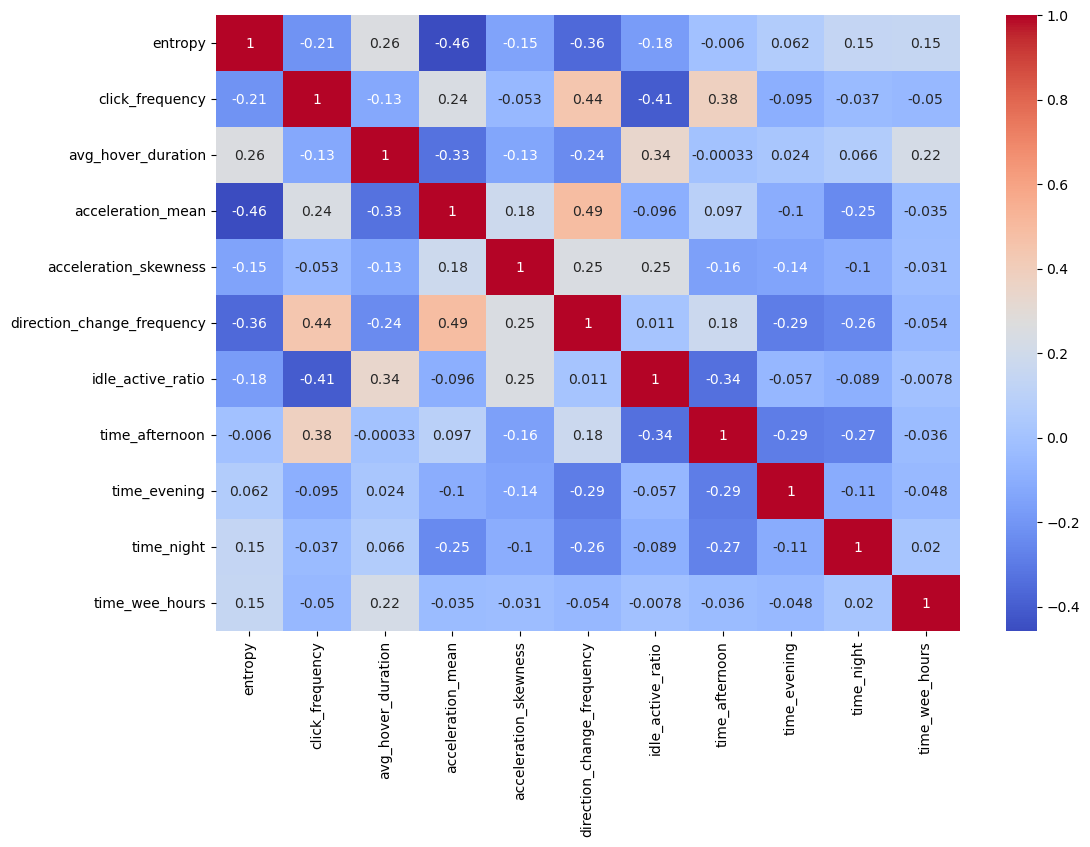

entropy                       1.0000
avg_hover_duration            0.2584
time_wee_hours                0.1507
time_night                    0.1452
time_evening                  0.0625
time_afternoon               -0.0060
acceleration_skewness        -0.1498
idle_active_ratio            -0.1768
click_frequency              -0.2122
direction_change_frequency   -0.3564
acceleration_mean            -0.4584
Name: entropy, dtype: float64


In [126]:
# Set the figure size BEFORE plotting
plt.figure(figsize=(12, 8))  # width=12 inches, height=8 inches

# Check correlations
corr = X.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Focus on correlations involving the feature with VIF=6
print(corr["entropy"].sort_values(ascending=False))

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X1 = X[[col for col in list(X.columns) if col != 'entropy']]
y = X['entropy']

model = LinearRegression()
model.fit(X1, y)

r2 = model.score(X1, y)
print(f"R^2 for Entropy regressed on others: {r2}")

R^2 for Entropy regressed on others: 0.3559246349419498


In [128]:
import statsmodels.api as sm

X1 = sm.add_constant(X1)
model = sm.OLS(y, X1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                entropy   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     24.20
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           2.39e-36
Time:                        12:19:02   Log-Likelihood:                -349.80
No. Observations:                 449   AIC:                             721.6
Df Residuals:                     438   BIC:                             766.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Standardize dataset to verify if condition number is still large.

In [129]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
# don't need to scale y

# Add constant to the standardized data
X1_scaled = sm.add_constant(X1_scaled)

# Fit the OLS model
model = sm.OLS(y, X1_scaled).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                entropy   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     24.20
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           2.39e-36
Time:                        12:19:02   Log-Likelihood:                -349.80
No. Observations:                 449   AIC:                             721.6
Df Residuals:                     438   BIC:                             766.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9576      0.025    117.375      0.0

Check covariance

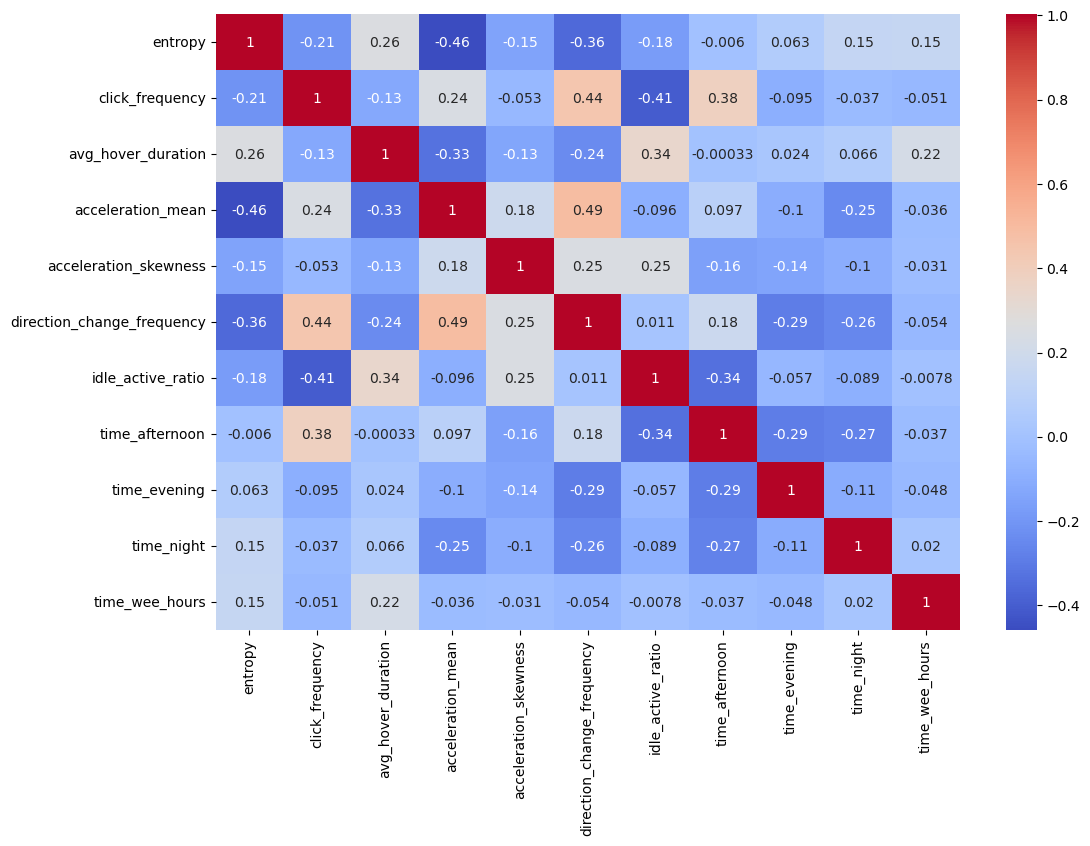

In [130]:
# Set the figure size BEFORE plotting
plt.figure(figsize=(12, 8))  # width=12 inches, height=8 inches
# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
# Check correlations
cov = pd.DataFrame(X_scaled_df).cov()

sns.heatmap(cov, annot=True, cmap="coolwarm")
plt.show()



In [131]:
#pd.set_option('display.float_format', '{:.4f}'.format)